In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Data.csv'
# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows to verify
data.head()


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [ ]:
# Check the shape of the dataset
data.shape

# Get a summary of the dataset
data.info()

# Check for missing values
data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

,0
class,0
cap-diameter,0
cap-shape,0
cap-surface,14120
cap-color,0
does-bruise-or-bleed,0
gill-attachment,9884
gill-spacing,25063
gill-color,0
stem-height,0


In [ ]:
# finding % of missing data to decide further
missing_data_percentage = data.isnull().sum() / len(data) *100
missing_data_percentage

,0
class,0.000000
cap-diameter,0.000000
cap-shape,0.000000
cap-surface,23.121387
cap-color,0.000000
does-bruise-or-bleed,0.000000
gill-attachment,16.184971
gill-spacing,41.040462
gill-color,0.000000
stem-height,0.000000


In [ ]:
# dropping columns with more than 20% data missing
columns_to_drop= missing_data_percentage[missing_data_percentage>20].index
data.drop(columns=columns_to_drop , inplace = True)

In [ ]:
# imputing columns acc to thier type with median and mode
data['gill-attachment']
data['ring-type']

,ring-type
0,g
1,g
2,g
3,p
4,p
...,...
61064,f
61065,f
61066,f
61067,f


In [ ]:
#both are categorical data, hence imputing with mode

data['gill-attachment'].fillna(data['gill-attachment'].mode()[0], inplace=True)
data['ring-type'].fillna(data['ring-type'].mode()[0], inplace=True)


<ipython-input-7-70ed4dd60414>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gill-attachment'].fillna(data['gill-attachment'].mode()[0], inplace=True)


In [ ]:
data.isnull().sum()

,0
class,0
cap-diameter,0
cap-shape,0
cap-color,0
does-bruise-or-bleed,0
gill-attachment,0
gill-color,0
stem-height,0
stem-width,0
stem-color,0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

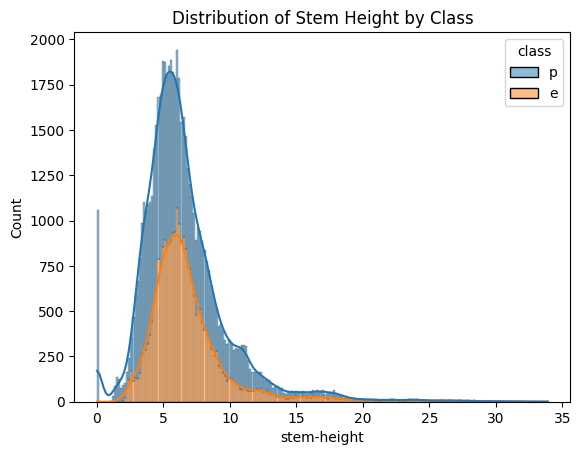

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of stem-height according to class (poisonous or edible)
sns.histplot(data=data, x='stem-height', kde=True, hue='class', multiple="stack")
plt.title('Distribution of Stem Height by Class')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


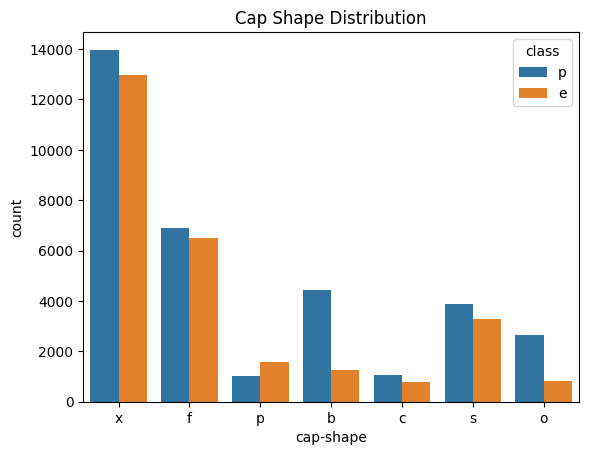

In [ ]:
# Visualize distribution of a categorical feature
sns.countplot(x='cap-shape', data=data , hue ='class')
plt.title('Cap Shape Distribution')
plt.show()

In [ ]:
numerical_columns = data.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_columns

['cap-diameter', 'stem-height', 'stem-width']

In [ ]:
categorical_columns = data.select_dtypes(exclude = ['int64','float64']).columns.tolist()
categorical_columns


['class',
 'cap-shape',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

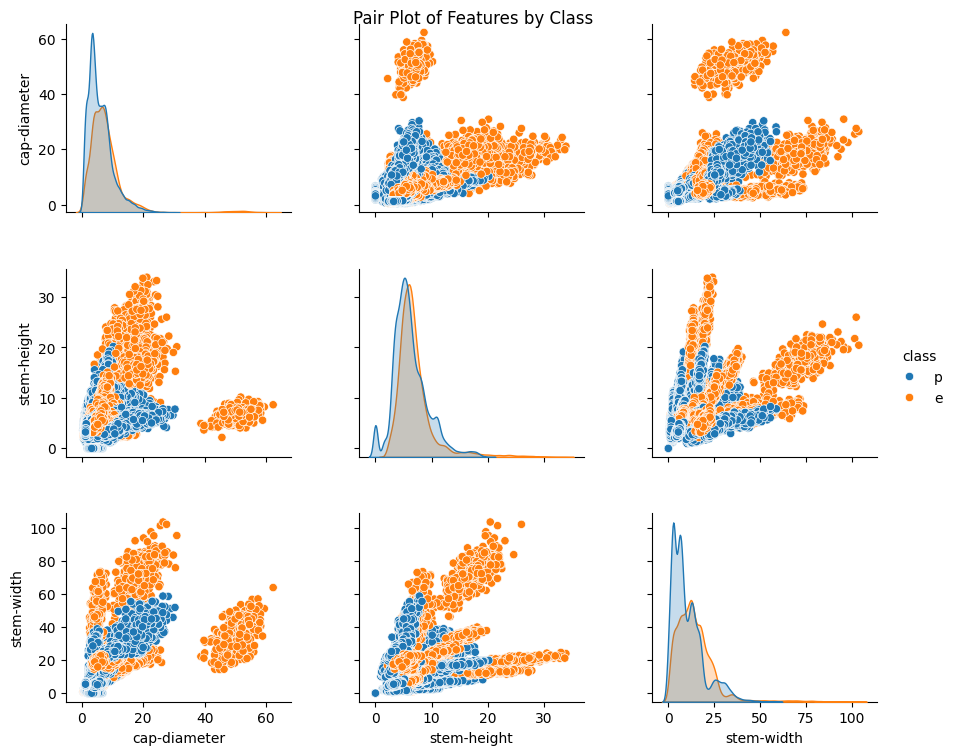

In [ ]:
#Pair plots visualize relationships between all features and the target variable, making it easier to spot patterns.
import warnings
warnings.filterwarnings("ignore")

sns.pairplot(data , hue ='class',height=2.5 ,aspect =1.2)
plt.suptitle('Pair Plot of Features by Class', y =1)
plt.subplots_adjust(hspace=0.3, wspace=0.3)  # Adjust hspace and wspace as needed
plt.show()



* Class Separation: The distinct clusters of blue and orange show that these features are helpful in distinguishing between edible and poisonous mushrooms.

* Cap-Diameter: Edible mushrooms generally have larger cap-diameter values compared to poisonous mushrooms, as shown in both the scatterplot and the diagonal KDE plots.
* Stem Features: Stem-height and stem-width seem to have different distributions and relationships depending on the class, further aiding classification.



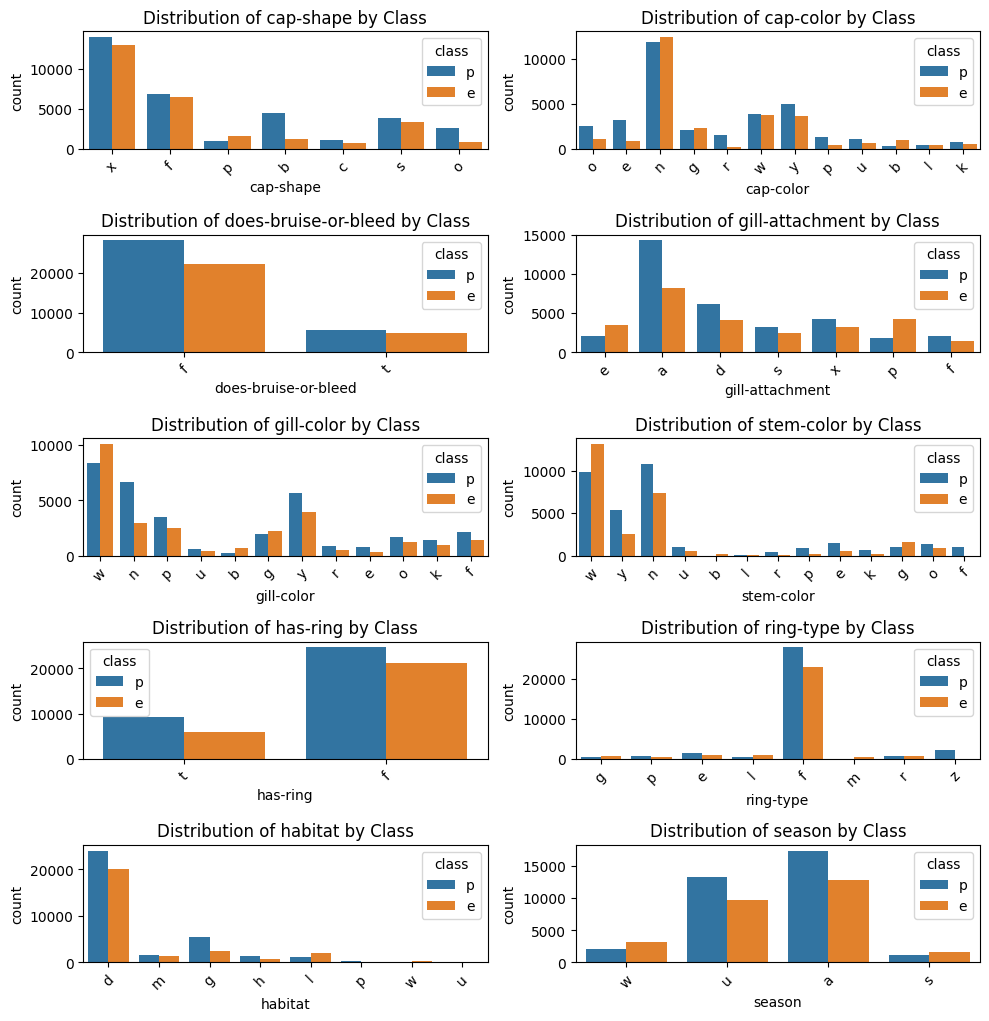

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of all categorical columns you want to analyze (excluding 'class')
categorical_columns = ['cap-shape',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

# Set the number of subplots based on the number of categorical features
plt.figure(figsize=(10, 20))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(len(categorical_columns), 2, i)
    sns.countplot(data=data, x=col, hue='class')  # Use hue to distinguish by 'class'
    plt.title(f'Distribution of {col} by Class')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()



 * all the categorical columns also provide certain distinction which may be helpful in identifying patterns for both the classes.

In [ ]:
#encoding the categorical columns

data["class"]=data["class"].map({"e":0 ,"p" :1})


In [ ]:
categorical_columns

['class',
 'cap-shape',
 'cap-color',
 'does-bruise-or-bleed',
 'gill-attachment',
 'gill-color',
 'stem-color',
 'has-ring',
 'ring-type',
 'habitat',
 'season']

In [ ]:
# one hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True).astype(int)
data_encoded.head()

,cap-diameter,stem-height,stem-width,class_1,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_s,season_u,season_w
0,15,16,17,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,16,17,18,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,14,17,17,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,14,15,15,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,14,16,17,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
for col in categorical_columns:
    print(f"Unique values in {col}: {data[col].unique()}")


Unique values in class: [1 0]
Unique values in cap-shape: ['x' 'f' 'p' 'b' 'c' 's' 'o']
Unique values in cap-color: ['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']
Unique values in does-bruise-or-bleed: ['f' 't']
Unique values in gill-attachment: ['e' 'a' 'd' 's' 'x' 'p' 'f']
Unique values in gill-color: ['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']
Unique values in stem-color: ['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']
Unique values in has-ring: ['t' 'f']
Unique values in ring-type: ['g' 'p' 'e' 'l' 'f' 'm' 'r' 'z']
Unique values in habitat: ['d' 'm' 'g' 'h' 'l' 'p' 'w' 'u']
Unique values in season: ['w' 'u' 'a' 's']


In [ ]:
data_encoded.head()

,cap-diameter,stem-height,stem-width,class_1,cap-shape_c,cap-shape_f,cap-shape_o,cap-shape_p,cap-shape_s,cap-shape_x,...,habitat_g,habitat_h,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,season_s,season_u,season_w
0,15,16,17,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,16,17,18,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,14,17,17,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,14,15,15,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,14,16,17,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#splitting the data for train test split
from sklearn.model_selection import train_test_split
x=data_encoded.drop('class_1',axis=1)
y=data['class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)


In [ ]:
#logistic regression
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=10000)
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Classification report (precision, recall, f1-score for each class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7638

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      8108
           1       0.78      0.80      0.79     10213

    accuracy                           0.76     18321
   macro avg       0.76      0.76      0.76     18321
weighted avg       0.76      0.76      0.76     18321


Confusion Matrix:
[[5867 2241]
 [2087 8126]]


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(x_train, y_train)

# Make predictions on the test data
y_pred_rf = rf.predict(x_test)

# Evaluate the model's performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")

# Display the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(cm_rf)

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 99.83%
Confusion Matrix:
[[ 8088    20]
 [   11 10202]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8108
           1       1.00      1.00      1.00     10213

    accuracy                           1.00     18321
   macro avg       1.00      1.00      1.00     18321
weighted avg       1.00      1.00      1.00     18321



In [ ]:
# performing cross-validation to check the model
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, x_train, y_train, cv=5)

# Print cross-validation results
print(f"Cross-Validation Accuracy: {cv_scores.mean() * 100:.2f}%")


Cross-Validation Accuracy: 99.78%


In [ ]:
# XG boost
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Initialize the XGBoost classifier
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model on the training data
xgboost_model.fit(x_train, y_train)

# Predict on the test data
y_pred_xgb = xgboost_model.predict(x_test)

# Calculate the accuracy
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")

# Confusion matrix
xgb_cm = confusion_matrix(y_test, y_pred_xgb)
print("Confusion Matrix:")
print(xgb_cm)

# Classification report
xgb_cr = classification_report(y_test, y_pred_xgb)
print("\nClassification Report:")
print(xgb_cr)


XGBoost Accuracy: 99.69%
Confusion Matrix:
[[ 8071    37]
 [   19 10194]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8108
           1       1.00      1.00      1.00     10213

    accuracy                           1.00     18321
   macro avg       1.00      1.00      1.00     18321
weighted avg       1.00      1.00      1.00     18321



# # since i m getting almost equal accuracy for both xgboost and random forest , i m moving forward with random forest as it is giving slightly more accuracy although xgboost is computationally much faster than random forest. Xgboost is preferable for large dataset and the model will be faster in production environment. But since this is a prediction for poisonous or edible mushrooms , I am choosing random forest.

But i m tuning hyperparameter for both the model for making them more robust

In [ ]:
# trying out with some hyper parameter tuning with xgboost model

from sklearn.model_selection import GridSearchCV

# Initialize XGBoost model
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],          # Number of trees
    'max_depth': [3, 4, 5],              # Maximum depth of the tree
    'learning_rate': [0.01, 0.1, 0.2],    # Step size shrinkage
    'subsample': [0.8, 1.0],              # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 1.0],       # Subsample ratio of columns when constructing each tree
    'gamma': [0, 0.1, 0.2]                # Minimum loss reduction required to make a further partition
}

# Set up Grid Search
grid_search = GridSearchCV(estimator=xgboost_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,  # Number of cross-validation folds
                           verbose=1,
                           n_jobs=-1)  # Use all available cores

# Fit the model to the training data
grid_search.fit(x_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("\nTest Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation Score: 0.9965378442480214

Test Accuracy: 0.9960155013372632
Confusion Matrix:
 [[ 8063    45]
 [   28 10185]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      8108
           1       1.00      1.00      1.00     10213

    accuracy                           1.00     18321
   macro avg       1.00      1.00      1.00     18321
weighted avg       1.00      1.00      1.00     18321



Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0.2, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best Cross-Validation Score: 0.9965378442480214

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Set up the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Set up Grid Search
grid_search_rf = GridSearchCV(estimator=rf_model,
                              param_grid=param_grid,
                              scoring='accuracy',
                              cv=2,  # Cross-validation folds
                              verbose=1,
                              n_jobs=-1)  # Use all available cores

# Fit the model on your training data
grid_search_rf.fit(x_train, y_train)

# Print the best parameters and score
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best Cross-Validation Score: {grid_search_rf.best_score_}")

# Evaluate the model on test data
best_rf_model = grid_search_rf.best_estimator_
test_accuracy = best_rf_model.score(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")


Fitting 2 folds for each of 324 candidates, totalling 648 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Cross-Validation Score: 0.9975671376438664
Test Accuracy: 0.9983079526226735
